### critial_feature 
- '임대보증금', '임대료', '단지내주차면수','전용면적별세대수', '면적_세대수_곱', '면적_세대수_곱_총합','면적_세대수_비율','임대건물구분_lb', '공급유형_lb', '자격유형_lb', 'ERROR1_lb' (+'공가수', '지역')

In [14]:
import pandas as pd
import warnings 
import numpy as np
from matplotlib import rc, rcParams
import matplotlib.pyplot as plt

warnings.filterwarnings(action='ignore')
rc('font',family='AppleGothic')
rcParams['axes.unicode_minus']=False

In [2]:
path = './data_전용면적별/'

train = pd.read_csv(path+'train_new.csv')
test = pd.read_csv(path+'test_new.csv')

train.shape, test.shape

((1420, 71), (541, 69))

array([[<AxesSubplot:title={'center':'임대보증금'}>,
        <AxesSubplot:title={'center':'임대료'}>,
        <AxesSubplot:title={'center':'단지내주차면수'}>],
       [<AxesSubplot:title={'center':'전용면적별세대수'}>,
        <AxesSubplot:title={'center':'면적_세대수_곱'}>,
        <AxesSubplot:title={'center':'면적_세대수_곱_총합'}>],
       [<AxesSubplot:title={'center':'면적_세대수_비율'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

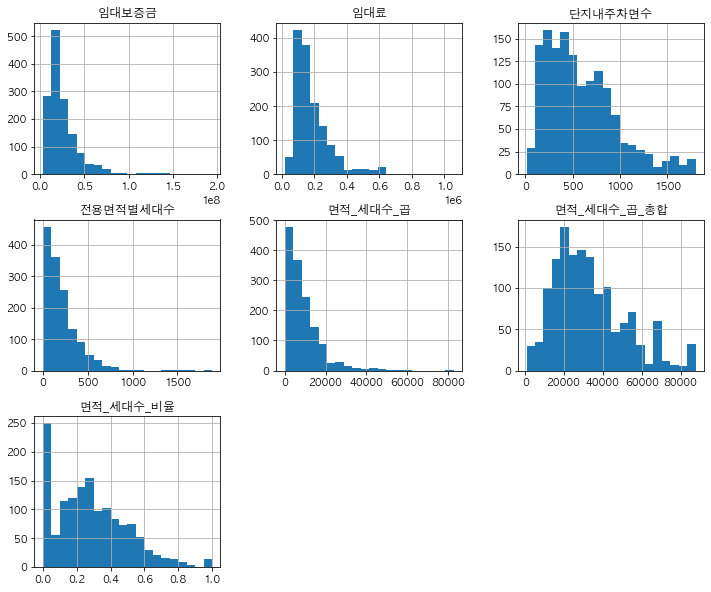

In [3]:
train[['임대보증금', '임대료', '단지내주차면수','전용면적별세대수',
       '면적_세대수_곱','면적_세대수_곱_총합', '면적_세대수_비율']].hist(figsize=(12,10), bins=20)


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score

In [5]:
train.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '공가수', '자격유형', '임대보증금',
       '임대료', '지하철', '버스정류장', '단지내주차면수', 'ERROR1', '임대건물구분_lb', '상가', '아파트',
       '지역_lb', '강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시',
       '부산광역시', '서울특별시', '세종특별자치시', '울산광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도',
       '충청북도', '공급유형_lb', '공공분양', '공공임대(10년)', '공공임대(50년)', '공공임대(5년)',
       '공공임대(분납)', '국민임대', '영구임대', '임대상가', '장기전세', '행복주택', '자격유형_lb', 'A', 'B',
       'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O',
       'ERROR1_lb', '나머지', '분양상가', '분양아파트', '등록차량수', '전용면적별세대수', '면적_세대수_곱',
       '면적_세대수_곱_총합', '면적_세대수_비율', '전용면적_비례_차량수'],
      dtype='object')

In [18]:
sel = ['임대보증금', '임대료', '단지내주차면수','전용면적별세대수', '면적_세대수_곱', '면적_세대수_곱_총합','면적_세대수_비율']
X = train[sel]
y = train[['전용면적_비례_차량수']]

# 피처스케일링
scaler = StandardScaler()
X_nor = scaler.fit_transform(X)

# 모델 
lr = LinearRegression()
knn = KNeighborsRegressor()
rf = RandomForestRegressor()
dt = DecisionTreeRegressor()

# 회귀는 교차검증
lr_scores = cross_val_score(lr, X_nor, y,scoring='neg_mean_absolute_error', cv=5) 
knn_scores = cross_val_score(knn, X_nor, y,scoring='neg_mean_absolute_error', cv=5)
rf_scores = cross_val_score(rf, X_nor, y,scoring='neg_mean_absolute_error', cv=5)
dt_scores = cross_val_score(dt, X_nor, y,scoring='neg_mean_absolute_error', cv=5)

lr_score = np.abs(lr_scores.mean())
knn_score = np.abs(knn_scores.mean())
rf_score = np.abs(rf_scores.mean())
dt_score = np.abs(dt_scores.mean())

print("LinearRegression : ", lr_score)
print("KNeighborsRegressor : ", knn_score)
print("RandomForestRegressor : ", rf_score)
print("DecisionTreeRegressor : ", dt_score)

score_std = [lr_score, knn_score, rf_score, dt_score ]
print(score_std)

LinearRegression :  46.605790502251494
KNeighborsRegressor :  44.912751065504274
RandomForestRegressor :  42.36274245521948
DecisionTreeRegressor :  57.064707055653344
[46.605790502251494, 44.912751065504274, 42.36274245521948, 57.064707055653344]


In [19]:
sel = ['임대보증금', '임대료', '단지내주차면수','전용면적별세대수','면적_세대수_곱', '면적_세대수_곱_총합','면적_세대수_비율']

X = train[sel]
y = train[['전용면적_비례_차량수']]

# 피처스케일링
scaler = MinMaxScaler()
X_nor = scaler.fit_transform(X)

# 모델 
lr = LinearRegression()
knn = KNeighborsRegressor()
rf = RandomForestRegressor()
dt = DecisionTreeRegressor()

# 회귀는 교차검증
lr_scores = cross_val_score(lr, X_nor, y,scoring='neg_mean_absolute_error', cv=5) 
knn_scores = cross_val_score(knn, X_nor, y,scoring='neg_mean_absolute_error', cv=5)
rf_scores = cross_val_score(rf, X_nor, y,scoring='neg_mean_absolute_error', cv=5)
dt_scores = cross_val_score(dt, X_nor, y,scoring='neg_mean_absolute_error', cv=5)

lr_score = np.abs(lr_scores.mean())
knn_score = np.abs(knn_scores.mean())
rf_score = np.abs(rf_scores.mean())
dt_score = np.abs(dt_scores.mean())

print("LinearRegression : ", lr_score)
print("KNeighborsRegressor : ", knn_score)
print("RandomForestRegressor : ", rf_score)
print("DecisionTreeRegressor : ", dt_score)

score_std = [lr_score, knn_score, rf_score, dt_score ]
print(score_std)

LinearRegression :  46.6057905022515
KNeighborsRegressor :  44.71316423875281
RandomForestRegressor :  42.25847730302621
DecisionTreeRegressor :  56.27081562518365
[46.6057905022515, 44.71316423875281, 42.25847730302621, 56.27081562518365]


DescribeResult(nobs=541, minmax=(0.06003323692729058, 979.6020934611033), mean=147.01547613384022, variance=23385.142574689537, skewness=1.9931020158029944, kurtosis=5.657710079772514)


(array([163.,  76.,  93.,  70.,  39.,  27.,  19.,  16.,  14.,   7.,   2.,
          4.,   1.,   1.,   2.,   3.,   0.,   1.,   2.,   1.]),
 array([6.00332369e-02, 4.90371362e+01, 9.80142393e+01, 1.46991342e+02,
        1.95968445e+02, 2.44945548e+02, 2.93922651e+02, 3.42899754e+02,
        3.91876857e+02, 4.40853960e+02, 4.89831063e+02, 5.38808166e+02,
        5.87785269e+02, 6.36762372e+02, 6.85739475e+02, 7.34716578e+02,
        7.83693681e+02, 8.32670784e+02, 8.81647887e+02, 9.30624990e+02,
        9.79602093e+02]),
 <BarContainer object of 20 artists>)

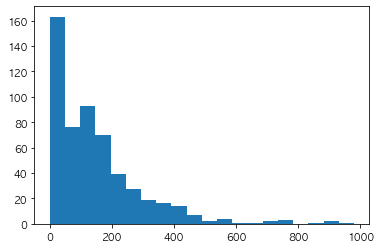

In [16]:
from scipy import stats

X_test = test[sel]
X_test_nor = scaler.transform(X_test)

rf.fit(X_nor, y)
pred = rf.predict(X_test_nor)
print(stats.describe(pred))
plt.hist(pred, bins=20)